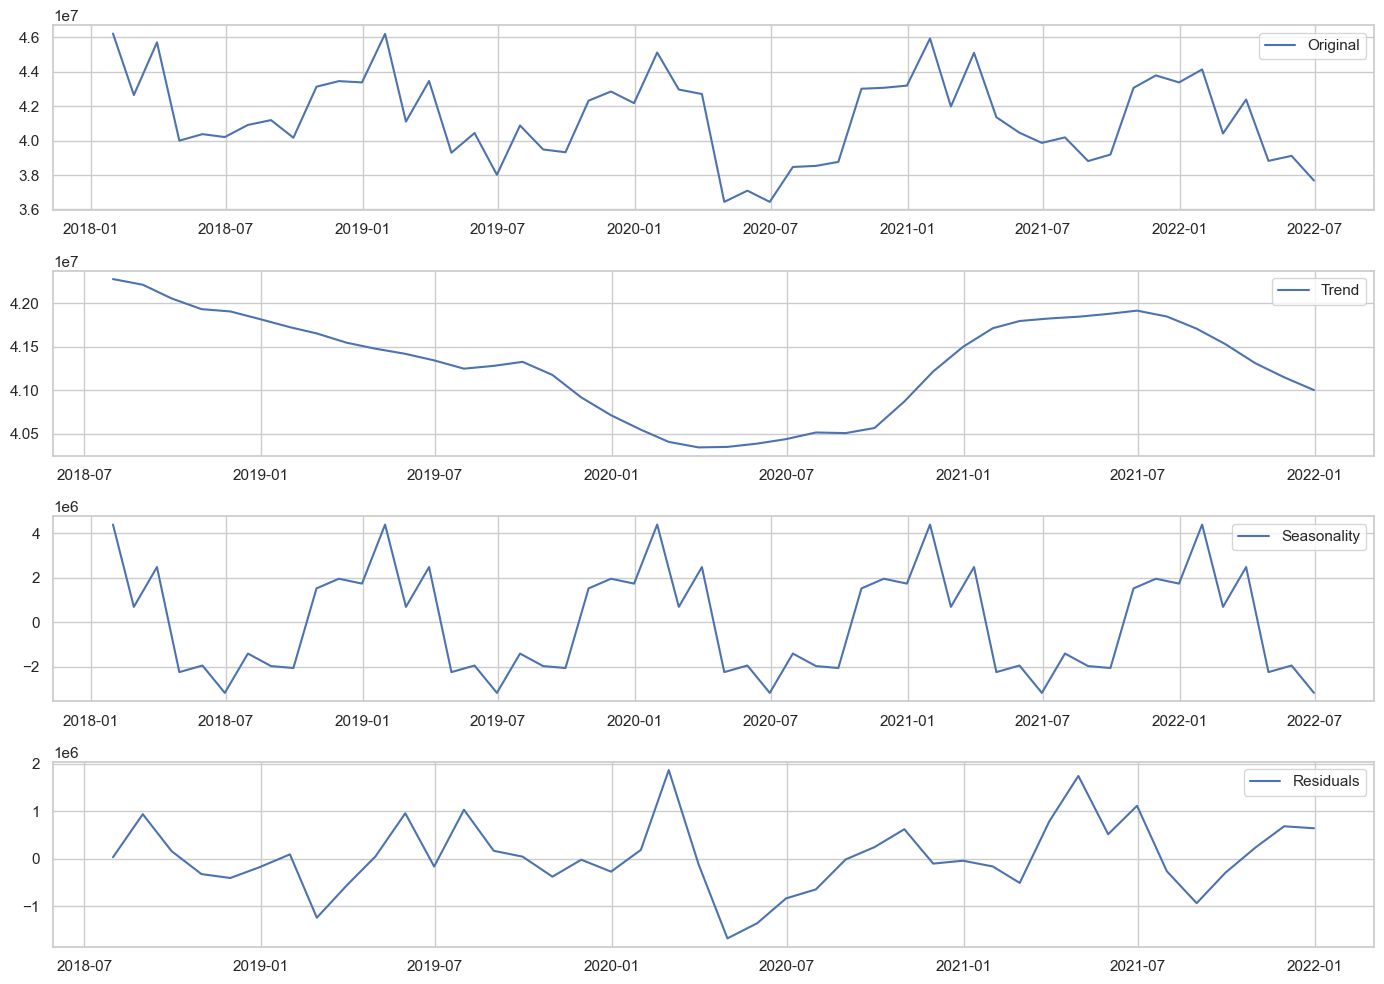

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd


df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df_daily = df.set_index('Date')

monthly_consumption_sum = df_daily['consumption'].resample('M').sum()

decomposition_monthly = seasonal_decompose(monthly_consumption_sum, model='additive')
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(monthly_consumption_sum, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(decomposition_monthly.trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(decomposition_monthly.seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(decomposition_monthly.resid, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

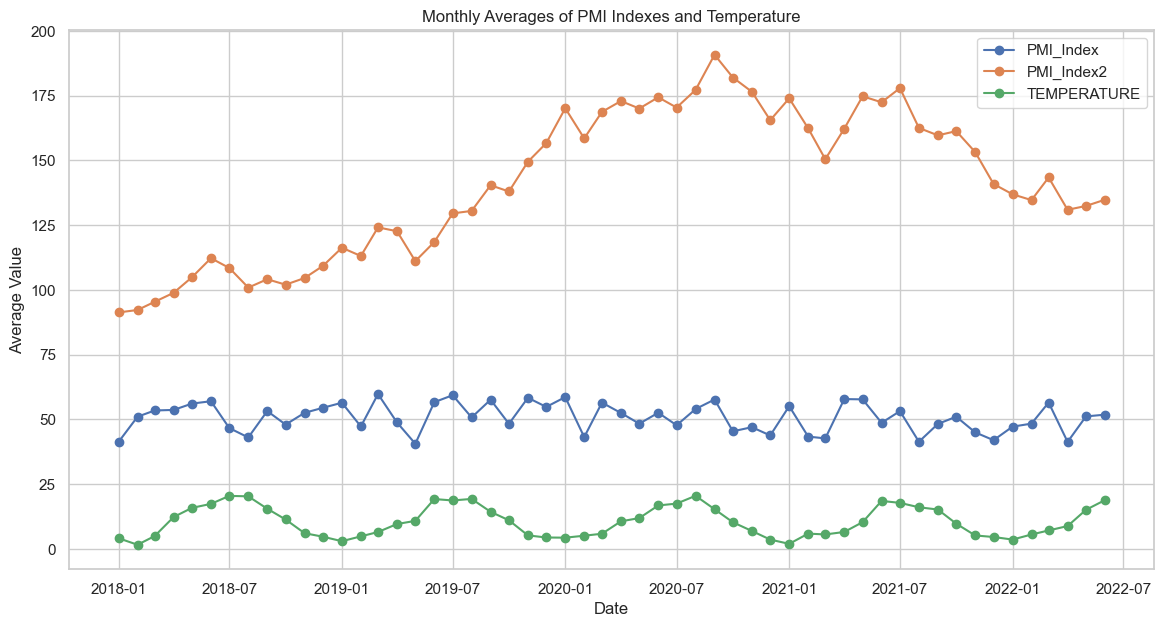

In [25]:
import pandas as pd
import matplotlib.pyplot as plt


monthly_averages = df.groupby(['Year', 'Month'])[['PMI_Index', 'PMI_Index2', 'TEMPERATURE']].mean()

monthly_averages_reset = monthly_averages.reset_index()

monthly_averages_reset['Date'] = pd.to_datetime(monthly_averages_reset[['Year', 'Month']].assign(DAY=1))

monthly_averages_reset.set_index('Date', inplace=True)

monthly_averages_plot = monthly_averages_reset.drop(['Year', 'Month'], axis=1)

plt.figure(figsize=(14, 7))
for column in monthly_averages_plot.columns:
    plt.plot(monthly_averages_plot.index, monthly_averages_plot[column], label=column, marker='o')

plt.title('Monthly Averages of PMI Indexes and Temperature')
plt.xlabel('Date')
plt.ylabel('Average Value')
plt.legend()
plt.show()

In [26]:
consumption_summary = df['consumption'].describe()
print(consumption_summary)

count    39407.000000
mean     56698.176872
std       9870.430861
min      33142.000000
25%      48630.000000
50%      56389.750000
75%      64973.375000
max      81749.000000
Name: consumption, dtype: float64


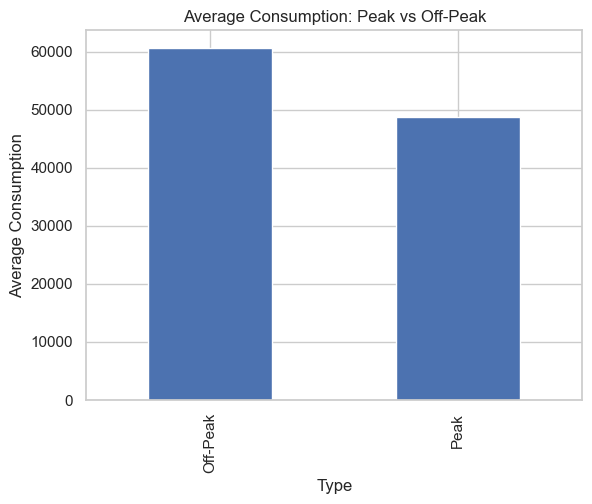

In [27]:
import matplotlib.pyplot as plt

peak_hours = [0, 1, 2, 3 ,4, 5,6,7]

df['Type'] = df['Hour'].apply(lambda x: 'Peak' if x in peak_hours else 'Off-Peak')

average_consumption = df.groupby('Type')['consumption'].mean()

# Plotting
average_consumption.plot(kind='bar')
plt.title('Average Consumption: Peak vs Off-Peak')
plt.ylabel('Average Consumption')
plt.xlabel('Type')
plt.show()

C:\Users\d.sahin\AppData\Local\Temp\ipykernel_10100\2868300941.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_df_filtered['Month-Year'] = pivot_df_filtered.index.map(lambda x: f'{x:02d}-{year_to_plot}')


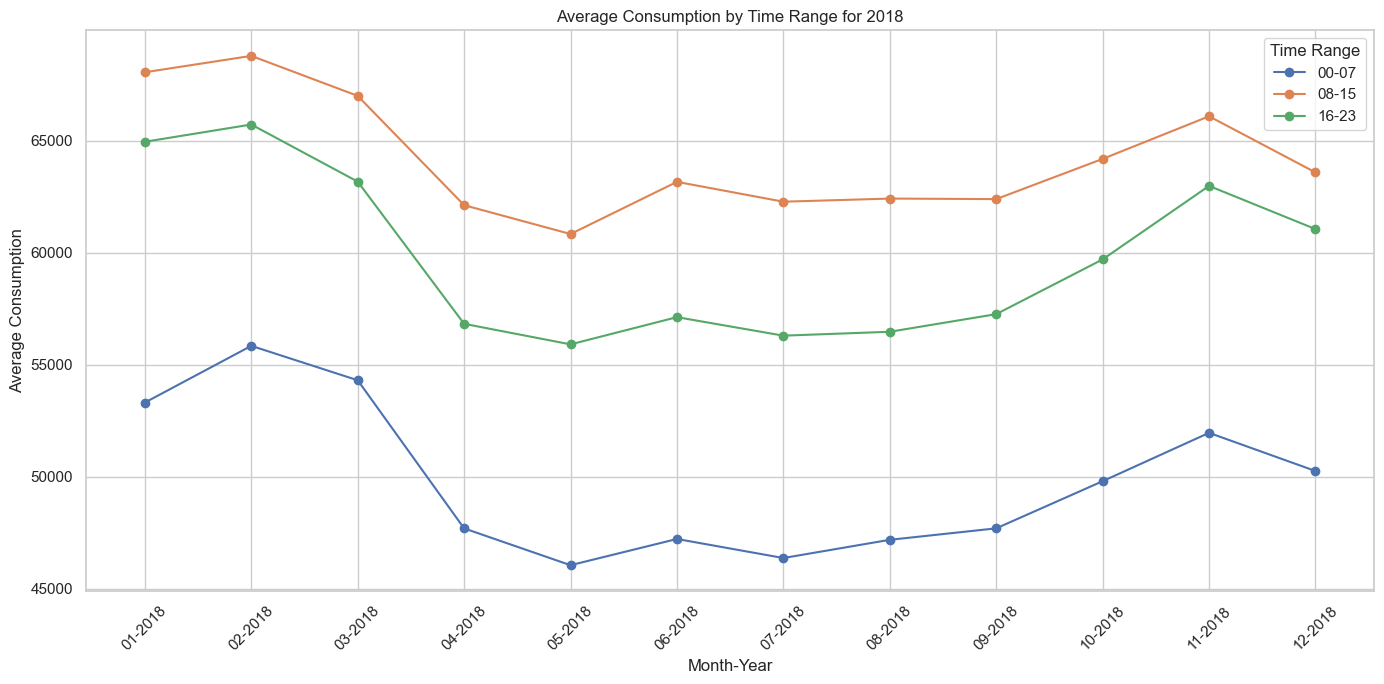

In [28]:
# Function to categorize hours
def categorize_hour(hour):
    if 0 <= hour <= 7:
        return '00-07'
    elif 8 <= hour <= 15:
        return '08-15'
    else:
        return '16-23'

df['TimeRange'] = df['Hour'].apply(categorize_hour)

average_consumption_by_range = df.groupby(['Year', 'Month', 'TimeRange'])['consumption'].mean().reset_index()

pivot_df = average_consumption_by_range.pivot_table(index=['Year', 'Month'], columns='TimeRange', values='consumption')

year_to_plot = 2019  

pivot_df_filtered = pivot_df.xs(year_to_plot, level='Year')

pivot_df_filtered['Month-Year'] = pivot_df_filtered.index.map(lambda x: f'{x:02d}-{year_to_plot}')

# Plotting
plt.figure(figsize=(14, 7))
for column in pivot_df_filtered.columns[:-1]:  # Excluding the Month-Year column
    plt.plot(pivot_df_filtered['Month-Year'], pivot_df_filtered[column], label=column, marker='o')

plt.title(f'Average Consumption by Time Range for {year_to_plot}')
plt.xlabel('Month-Year')
plt.ylabel('Average Consumption')
plt.xticks(rotation=45)
plt.legend(title='Time Range')
plt.tight_layout()
plt.show()

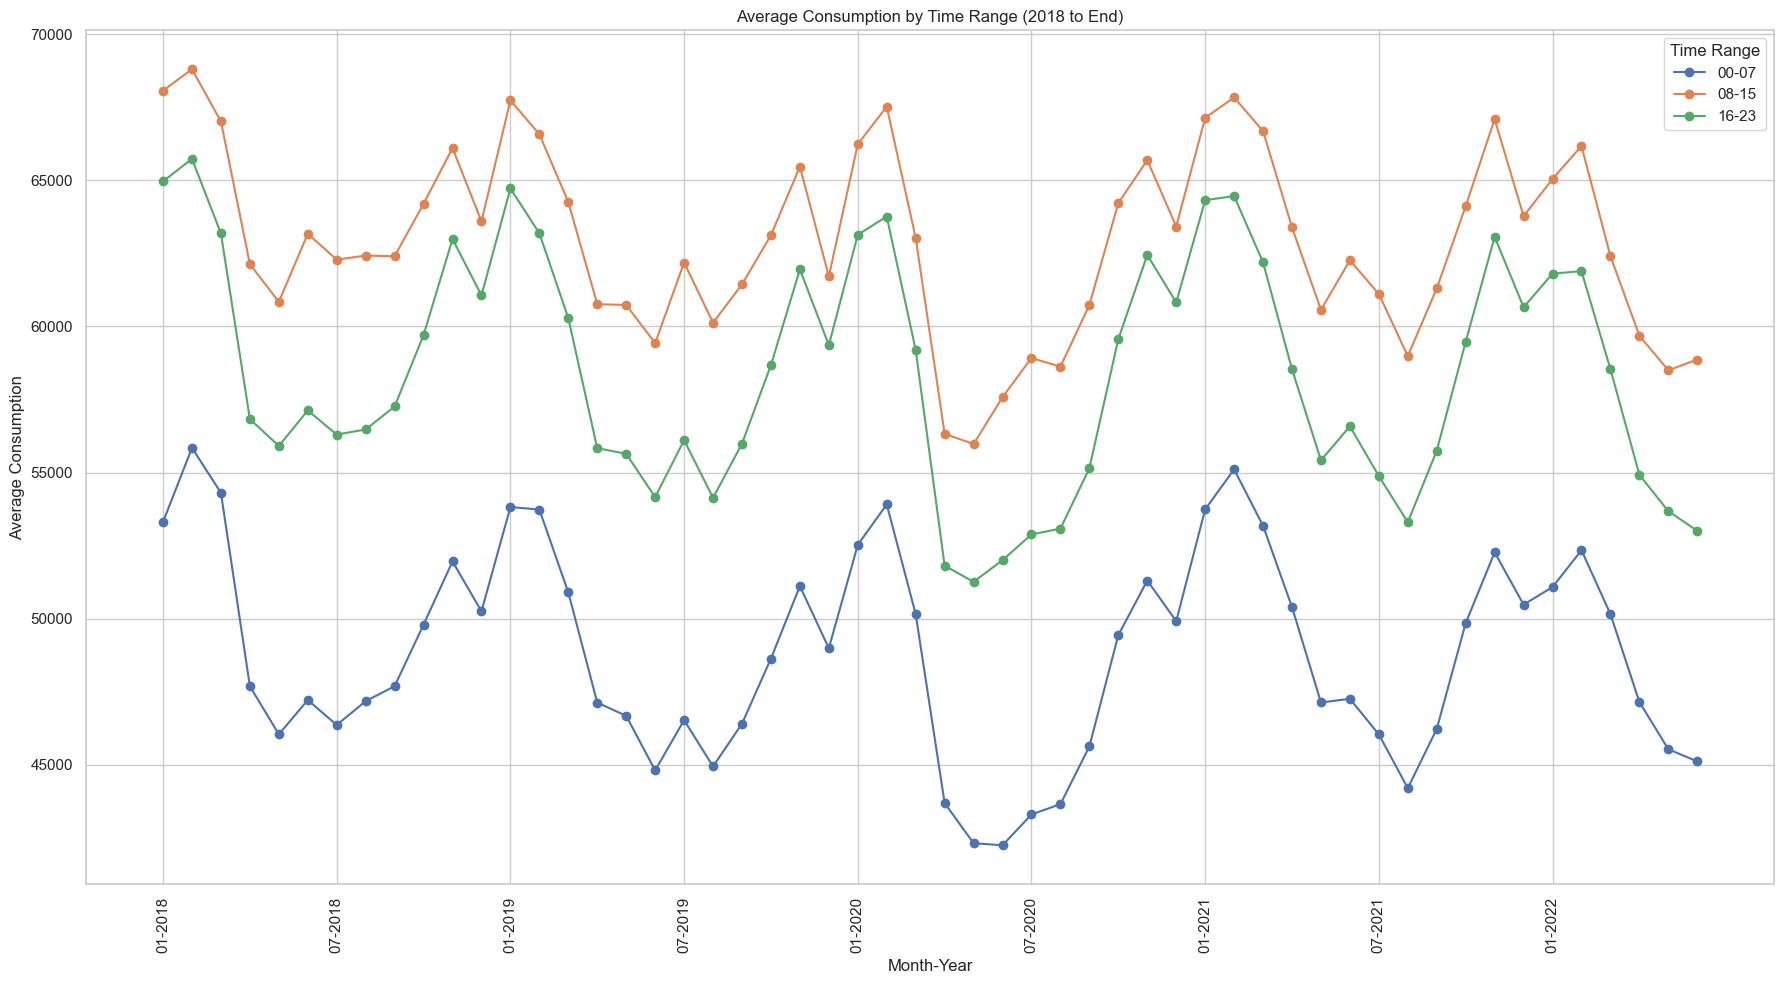

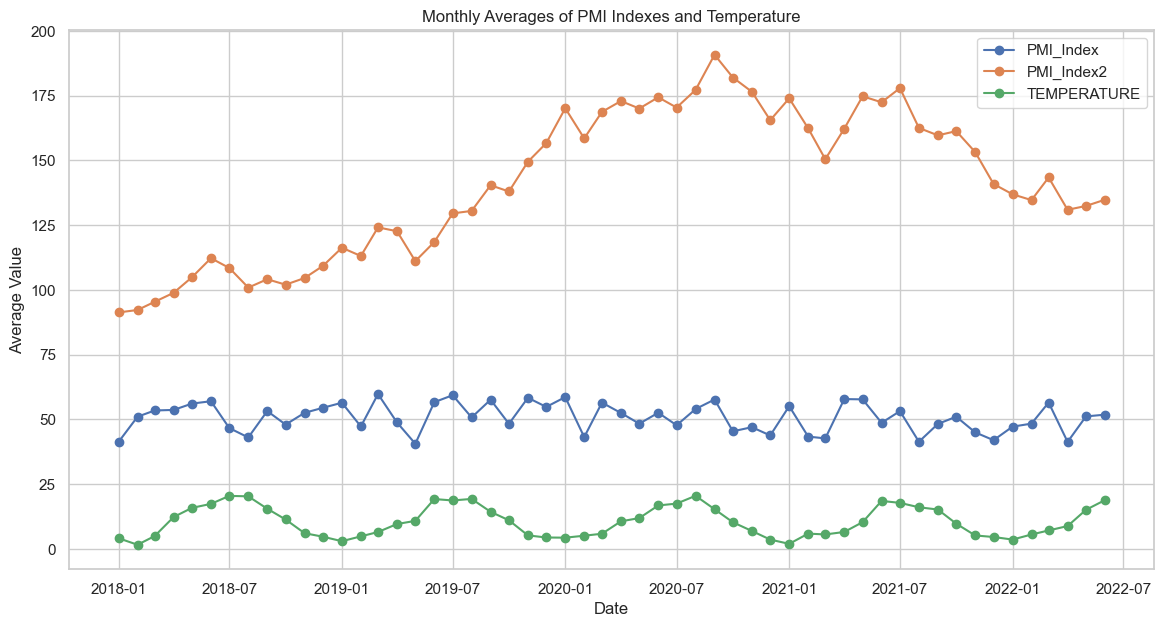

In [30]:
import pandas as pd
import matplotlib.pyplot as plt


def categorize_hour(hour):
    if 0 <= hour <= 7:
        return '00-07'
    elif 8 <= hour <= 15:
        return '08-15'
    else:
        return '16-23'

df['TimeRange'] = df['Hour'].apply(categorize_hour)

average_consumption_by_range = df.groupby(['Year', 'Month', 'TimeRange'])['consumption'].mean().reset_index()

pivot_df = average_consumption_by_range.pivot_table(index=['Year', 'Month'], columns='TimeRange', values='consumption')

pivot_df['Month-Year'] = pivot_df.index.map(lambda x: f"{x[1]:02d}-{x[0]}")

plt.figure(figsize=(18, 10))

time_ranges = ['00-07', '08-15', '16-23']
for time_range in time_ranges:
    plt.plot(pivot_df['Month-Year'], pivot_df[time_range], label=time_range, marker='o')

plt.title('Average Consumption by Time Range (2018 to End)')
plt.xticks(rotation=90)
plt.xlabel('Month-Year')
plt.ylabel('Average Consumption')
plt.legend(title='Time Range')
plt.tight_layout()

plt.xticks(pivot_df['Month-Year'][::6])  # Example: Show every 6th label for clarity

plt.show()


monthly_averages = df.groupby(['Year', 'Month'])[['PMI_Index', 'PMI_Index2', 'TEMPERATURE']].mean()

monthly_averages_reset = monthly_averages.reset_index()

monthly_averages_reset['Date'] = pd.to_datetime(monthly_averages_reset[['Year', 'Month']].assign(DAY=1))

# Set 'Date' as the index
monthly_averages_reset.set_index('Date', inplace=True)

monthly_averages_plot = monthly_averages_reset.drop(['Year', 'Month'], axis=1)

plt.figure(figsize=(14, 7))
for column in monthly_averages_plot.columns:
    plt.plot(monthly_averages_plot.index, monthly_averages_plot[column], label=column, marker='o')

plt.title('Monthly Averages of PMI Indexes and Temperature')
plt.xlabel('Date')
plt.ylabel('Average Value')
plt.legend()
plt.show()

In [31]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'IsWeekend', 'IsBankHoliday',
       'consumption', 'dam', 'solar', 'ror', 'WindOffshore', 'WindOnshore',
       'HardCoal', 'Nuclear', 'NaturalGas', 'Consumptionfromnonren',
       'Renewable', 'difofspreads', 'max_spread', 'min_spread',
       'Clean_Spark_Spread', 'Clean_Dark_Spread', 'NetImport', 'price',
       'TEMPERATURE', 'WIND', 'PMI_Index', 'PMI_Index2', 'Date', 'Type',
       'TimeRange'],
      dtype='object')

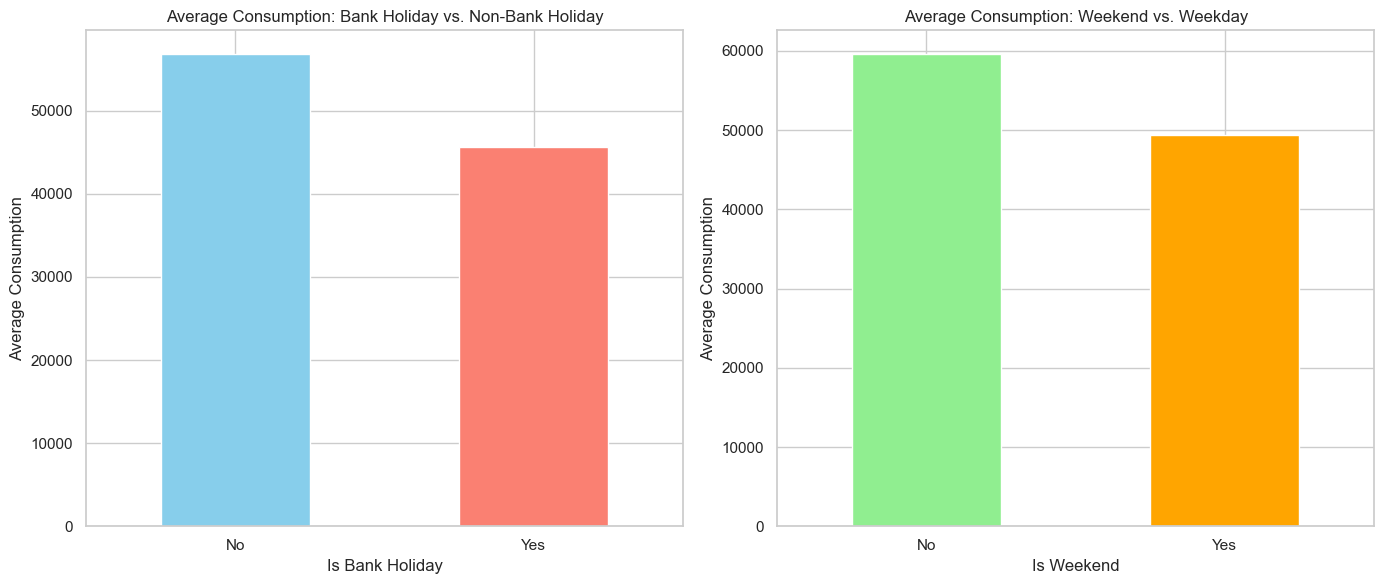

In [33]:
import matplotlib.pyplot as plt

avg_consumption_bankholiday = df.groupby('IsBankHoliday')['consumption'].mean()

avg_consumption_weekend = df.groupby('IsWeekend')['consumption'].mean()


fig, ax = plt.subplots(1, 2, figsize=(14, 6))

avg_consumption_bankholiday.plot(kind='bar', ax=ax[0], color=['skyblue', 'salmon'])
ax[0].set_title('Average Consumption: Bank Holiday vs. Non-Bank Holiday')
ax[0].set_xlabel('Is Bank Holiday')
ax[0].set_ylabel('Average Consumption')
ax[0].set_xticklabels(['No', 'Yes'], rotation=0)

avg_consumption_weekend.plot(kind='bar', ax=ax[1], color=['lightgreen', 'orange'])
ax[1].set_title('Average Consumption: Weekend vs. Weekday')
ax[1].set_xlabel('Is Weekend')
ax[1].set_ylabel('Average Consumption')
ax[1].set_xticklabels(['No', 'Yes'], rotation=0)

plt.tight_layout()
plt.show()


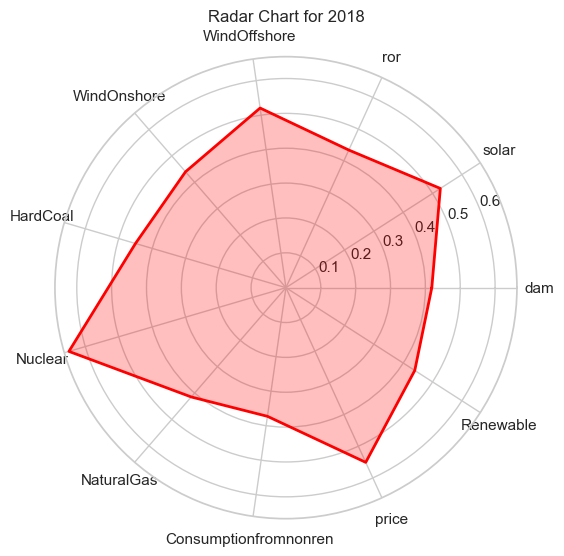

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

def create_radar_chart_for_year(df, year, columns):
    monthly_averages = df[df['Year'] == year].groupby(['Year', 'Month'])[columns].mean()
    
    normalized_data = (monthly_averages - monthly_averages.min()) / (monthly_averages.max() - monthly_averages.min())
    
    yearly_average = normalized_data.mean().values
    
    num_vars = len(columns)
    
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    yearly_average = np.concatenate((yearly_average,[yearly_average[0]]))
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, yearly_average, color='red', alpha=0.25)
    ax.plot(angles, yearly_average, color='red', linewidth=2)  # Change the color as needed
    
    plt.xticks(angles[:-1], columns)
    
    plt.title(f'Radar Chart for {year}')
    
    plt.show()

columns = ['dam', 'solar', 'ror', 'WindOffshore', 'WindOnshore', 'HardCoal', 'Nuclear', 'NaturalGas', 'Consumptionfromnonren', 'price', 'Renewable']

create_radar_chart_for_year(df, 2018, columns)